# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 8: *KrawtchoukPolynomials*
Compute two dimensional weighted Krawtchouk polynomials 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import createVectorF, createImageF
from ImageRegionsUtilities import nCr, risingFactorial
from PlotUtilities import plotSurface, plotCurve 

# Math and iteration
from math import  sqrt, factorial
from timeit import itertools

### Parameters:
    p = Polynomial parameter. 0.5 for centralized polynomials. It should be between .1 and .9
    width = Width of the data image. Number of polynomials. It must be less that 100 to avoid overflow
    numPolynomialsDraw = Number of polynomials to draw

In [2]:
numPolynomialsDraw = 5
p = 0.3
width = 100

### Obtain polinomials

In [3]:
# Data containers
sigma = createVectorF(width)
ro = createVectorF(width)
K = createImageF(width,width)

# Coefficient size
N = width-1

# Weight. It can be replaced by recurrence relation
for x in range(0,width): 
    sigma[x] = nCr(N, x) * pow(p,x) * pow(1-p,N-x)
    
# Scale factor. It can be replaced by recurrence relation
for n in range(0,width): 
    ro[n] = pow(-1,n) * pow((1-p)/p,n) * (float(factorial(n)) / risingFactorial(-N, n))

# Krawtchouk matrix that store result of the polynomial
# Each row is a polynomial each column is the polynomial value for an x value
# Alternatively, we could have used the polynomial generating function
for n,x in itertools.product(range(0, width), range(0, width)):
    for i in range(0,width):
        K[n,x] += pow(-1,i) * nCr(N-x, n-i) * nCr(x,i) * pow(p,n-i) * pow(1.0-p,i) 
            
# Normalize rows for stability 
for n in range(0,width):     
    scale = K[n,0]
    for x in range(0,width):
        K[n,x] /= scale            

# Product defining the weighted
Kweighted = createImageF(width,width)
for n,x in itertools.product(range(0, width), range(0, width)):
    Kweighted[n,x] = K[n,x]*sqrt(sigma[x]/ro[n])

### Plot

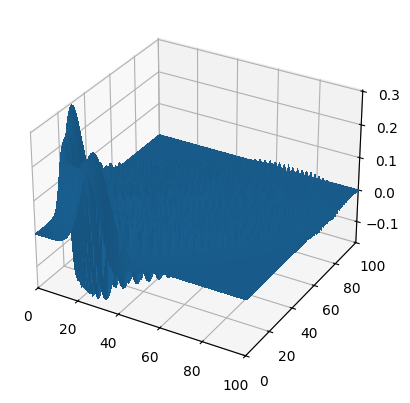

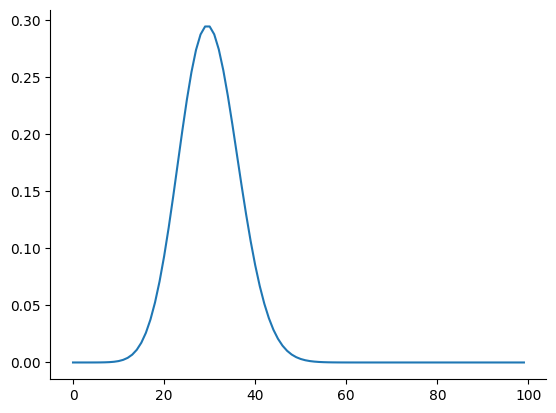

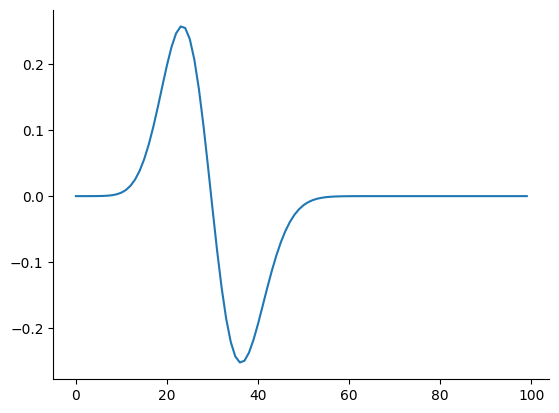

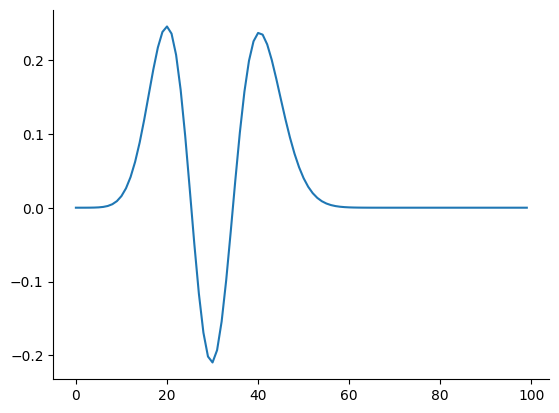

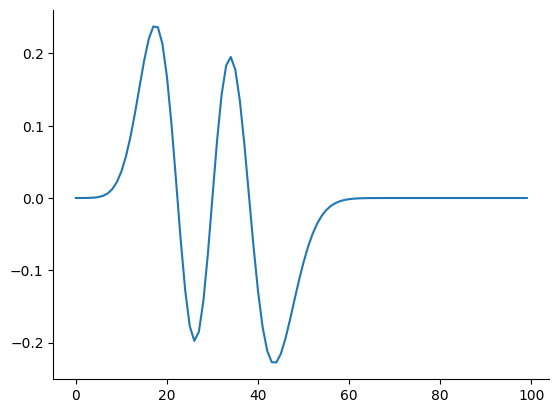

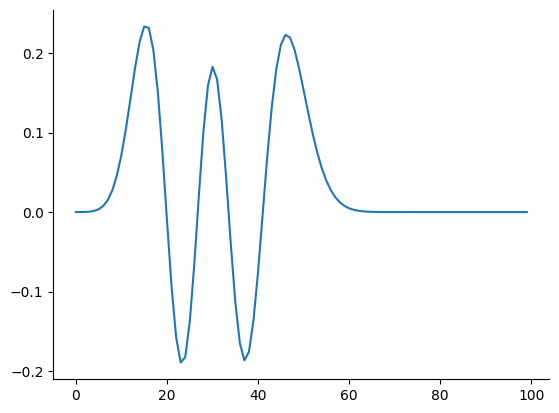

In [4]:
plotSurface(Kweighted)
for n in range(0,numPolynomialsDraw):
    plotCurve(Kweighted[n,:])